# AAL Sales Analysis Dashboard

#### A Dashboard generating various reports and projections to help AAL Sales and Marketing (S&M) Department to arrive informed business decision.

##### Author: Angshuman Nandi

In [131]:
# Importing required libraries
import pandas as pd
import seaborn as sns

### 1. Data Wrangling

#### Requirements 1.a & 1.b

In [132]:
# a. Ensure that the data is clean and free from any missing or incorrect entries
df = pd.read_csv('AusApparalSales4thQrt2020.csv')
# Initial check for data set we received from supplied sample data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB
None


In [133]:
# Check for missing values
print("Missing values in dataset:")
print(df.isna().sum())

Missing values in dataset:
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


In [134]:
# Getting a look at different columns we have with data frame
print(df.columns)

Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')


In [135]:
# Check for incorrect entries
entire_date_range = df['Date'].unique()
print(entire_date_range)

['1-Oct-2020' '2-Oct-2020' '3-Oct-2020' '4-Oct-2020' '5-Oct-2020'
 '6-Oct-2020' '7-Oct-2020' '8-Oct-2020' '9-Oct-2020' '10-Oct-2020'
 '11-Oct-2020' '12-Oct-2020' '13-Oct-2020' '14-Oct-2020' '15-Oct-2020'
 '16-Oct-2020' '17-Oct-2020' '18-Oct-2020' '19-Oct-2020' '20-Oct-2020'
 '21-Oct-2020' '22-Oct-2020' '23-Oct-2020' '24-Oct-2020' '25-Oct-2020'
 '26-Oct-2020' '27-Oct-2020' '28-Oct-2020' '29-Oct-2020' '30-Oct-2020'
 '1-Nov-2020' '2-Nov-2020' '3-Nov-2020' '4-Nov-2020' '5-Nov-2020'
 '6-Nov-2020' '7-Nov-2020' '8-Nov-2020' '9-Nov-2020' '10-Nov-2020'
 '11-Nov-2020' '12-Nov-2020' '13-Nov-2020' '14-Nov-2020' '15-Nov-2020'
 '16-Nov-2020' '17-Nov-2020' '18-Nov-2020' '19-Nov-2020' '20-Nov-2020'
 '21-Nov-2020' '22-Nov-2020' '23-Nov-2020' '24-Nov-2020' '25-Nov-2020'
 '26-Nov-2020' '27-Nov-2020' '28-Nov-2020' '29-Nov-2020' '30-Nov-2020'
 '1-Dec-2020' '2-Dec-2020' '3-Dec-2020' '4-Dec-2020' '5-Dec-2020'
 '6-Dec-2020' '7-Dec-2020' '8-Dec-2020' '9-Dec-2020' '10-Dec-2020'
 '11-Dec-2020' '12-Dec-2020' '13-

In [136]:
# Let's get a stock of dates with inaccurate data
all_unique_exiting_valid_dates = set([i. strftime('%d-%b-%Y') for i in pd.to_datetime(df['Date']).unique()])
complete_desired_dates = set([i.strftime('%d-%b-%Y') for i in pd.date_range(start = '1-oct-2020' , end = '31-dec-2020')])
print(complete_desired_dates - all_unique_exiting_valid_dates)

{'31-Oct-2020', '31-Dec-2020'}


#### Requirement 1.c : to be ignored as advised by class teacher (Rahul).

#### Requirement 1.d

I recommend using GroupBy() for initial data segmentation when dealing with large datasets that require segment-specific processing. Its memory-efficient implementation makes it ideal for handling large-scale data analysis tasks. However, for simple merging operations without the need for aggregation, using pandas merge() or concat() functions might be more straightforward.

### 2. Data analysis

#### Requirements 2.a, 2.b, 2.c & 2.d

In [137]:
# Perform descriptive statistical analysis
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [138]:
df['Sales'].describe()

count      7560.000000
mean      45013.558201
std       32253.506944
min        5000.000000
25%       20000.000000
50%       35000.000000
75%       65000.000000
max      162500.000000
Name: Sales, dtype: float64

In [139]:
df['Unit'].describe()

count    7560.000000
mean       18.005423
std        12.901403
min         2.000000
25%         8.000000
50%        14.000000
75%        26.000000
max        65.000000
Name: Unit, dtype: float64

In [140]:
df['Sales'].mode()

0    22500
Name: Sales, dtype: int64

In [141]:
df['Unit'].mode()

0    9
Name: Unit, dtype: int64

In [142]:
# Identify the group with the highest sales and the group with the lowest sales based on the data provided.
df.groupby('Group').agg({'Sales':'sum'}).sort_values('Sales', ascending=False)

,Sales
Group,
Men,85750000
Women,85442500
Kids,85072500
Seniors,84037500


In [143]:
# Another way to achieve the highest and lowest sales
highest_sales = df.groupby('State')['Sales'].sum().idxmax()
lowest_sales = df.groupby('State')['Sales'].sum().idxmin()
print(f"State with highest sales: {highest_sales}")
print(f"State with lowest sales: {lowest_sales}")

State with highest sales:  VIC
State with lowest sales:  WA


In [144]:
# weekly, monthly, and quarterly reports
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0      2020-10-01
1      2020-10-01
2      2020-10-01
3      2020-10-01
4      2020-10-01
          ...    
7555   2020-12-30
7556   2020-12-30
7557   2020-12-30
7558   2020-12-30
7559   2020-12-30
Name: Date, Length: 7560, dtype: datetime64[ns]

In [145]:
df['Week'] = df['Date'].dt.isocalendar().week
df['Week']

0       40
1       40
2       40
3       40
4       40
        ..
7555    53
7556    53
7557    53
7558    53
7559    53
Name: Week, Length: 7560, dtype: UInt32

In [146]:
df['Month'] = df['Date'].dt.month_name()
df['Month']

0        October
1        October
2        October
3        October
4        October
          ...   
7555    December
7556    December
7557    December
7558    December
7559    December
Name: Month, Length: 7560, dtype: object

In [147]:
df['Year'] = df['Date'].dt.year
df['Year']

0       2020
1       2020
2       2020
3       2020
4       2020
        ... 
7555    2020
7556    2020
7557    2020
7558    2020
7559    2020
Name: Year, Length: 7560, dtype: int32

### 3. Data visualization

#### Requirements 3a & 3b

<Axes: xlabel='State'>

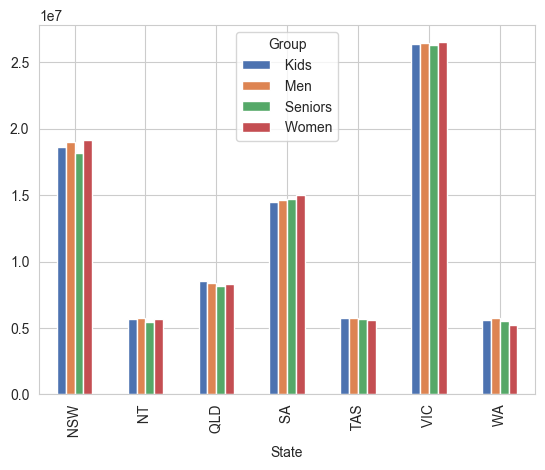

In [148]:
# State-wise sales analysis
df.pivot_table(
    index='State',
    columns='Group',
    values='Sales',
    aggfunc='sum',
).plot(kind='bar')

<Axes: xlabel='Group'>

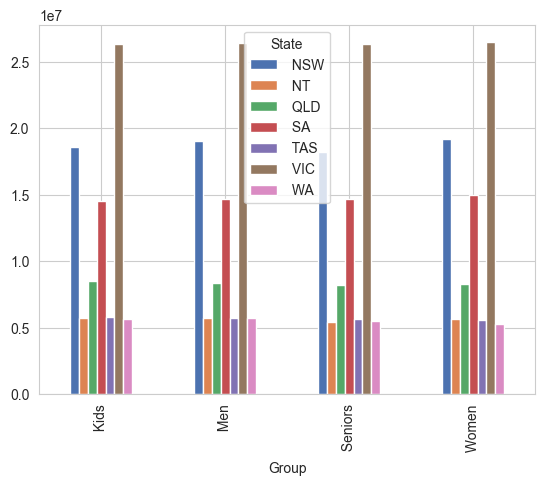

In [149]:
# Group-wise sales analysis
df.pivot_table(
    index='Group',
    columns='State',
    values='Sales',
    aggfunc='sum',
).plot(kind='bar')

In [150]:
# Time-of-the-day analysis
df.groupby('Time').agg({'Sales': 'sum'})

,Sales
Time,
Afternoon,114007500
Evening,112087500
Morning,114207500


In [151]:
df.groupby('Group').agg({'Sales': 'sum'})

,Sales
Group,
Kids,85072500
Men,85750000
Seniors,84037500
Women,85442500


<Axes: xlabel='Time'>

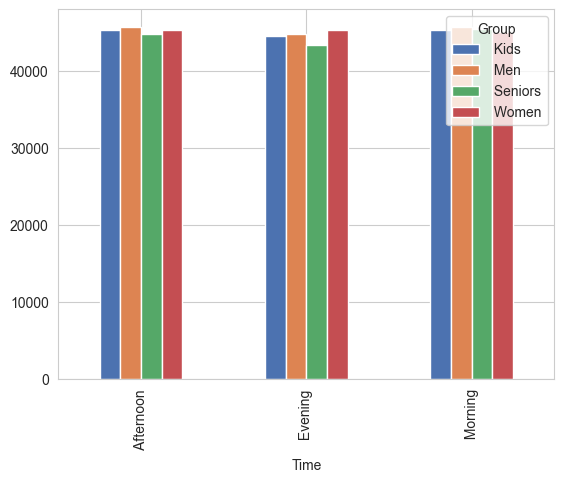

In [152]:
df.pivot_table(
    index='Time',
    columns='Group',
    values='Sales',
).plot(kind='bar')

#### 3.c Used Panda library inbuilt plot utility for a faster developer experience, cleaner integrated native capability and simplistic visualization.

### 4. Report generation

<Axes: >

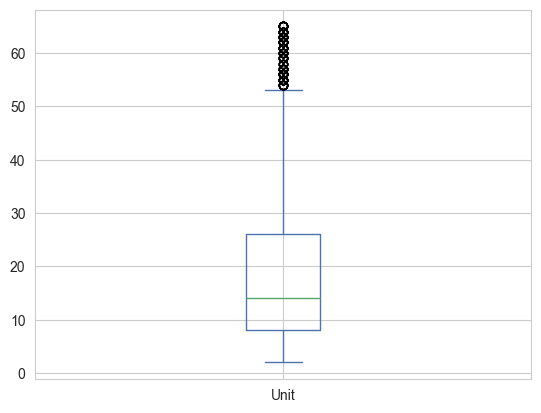

In [153]:
# Box plot
df['Unit'].plot(kind='box')

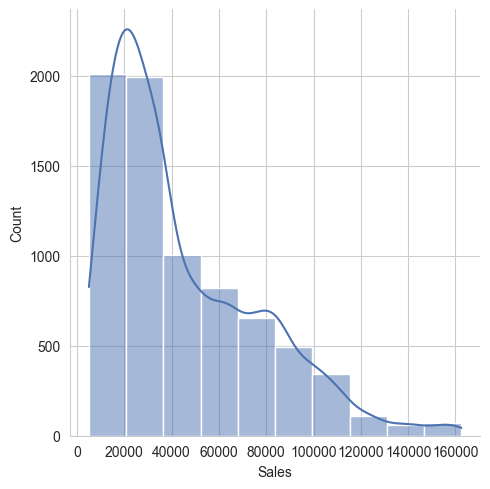

In [154]:
# Seaborn distribution plot
sns.displot(
    df['Sales'],
    kde=True,
    bins=10,
)

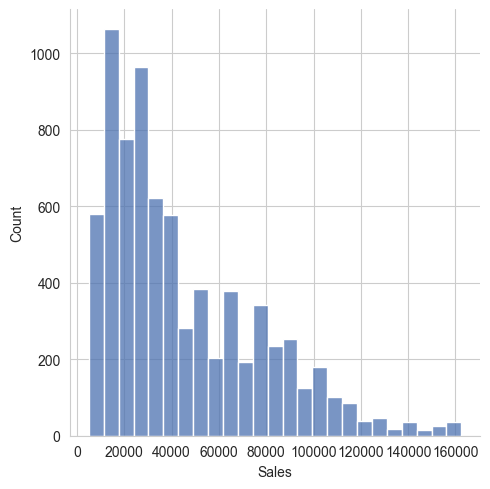

In [155]:
# Another Seaborn distribution plot with higher bins and without kde
sns.set_palette("deep")
sns.displot(
    df['Sales'],
    kde=False,
    bins=25,
)